In [1]:
# @gyleodhis=====gyleodhis@outlook.com=====
import numpy as np
# Generate an array of 10 random integers less than 100 
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
x


array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

Accesiing four different elemets in a array

In [2]:
k=[x[2], x[5], x[9], x[0]]
k
#We can also do it this way
z=[2,5,9,1]
x[z]


array([14, 20, 74, 92])

Fancy indexing also works in multiple dimensions. Consider the following array:

In [3]:
x = np.arange(12).reshape((3,4))
x


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Like with standard indexing, the first index refers to the row, and the second to the
column:

In [4]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
x[row, col]


array([ 2,  5, 11])

Selecting Random Points.

In [5]:
mean = [0,0]
cov = [[1,2], [2,5]]
x = rand.multivariate_normal(mean, cov, 100)
x.shape


(100, 2)

we can visualize these points as a scatter plot

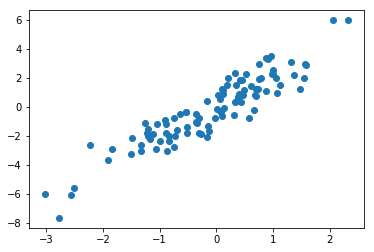

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn; seaborn.set() #for plot styling
plt.scatter(x[:,0], x[:,1]);


Let’s use fancy indexing to select 20 random points. We’ll do this by first choosing 20
random indices with no repeats, and use these indices to select a portion of the origi‐
nal array:

In [7]:
indices = np.random.choice(x.shape[0], 20, replace=False)
indices


array([41, 62, 78,  0, 13, 89, 55, 69,  6, 56, 27, 61, 43, 32, 90, 20, 72,
       30, 74, 71])

In [8]:
selection = x[indices] # Fancy indexing here
selection.shape


(20, 2)

Now to see which points were selected, let’s over-plot large circles at the locations of
the selected points 

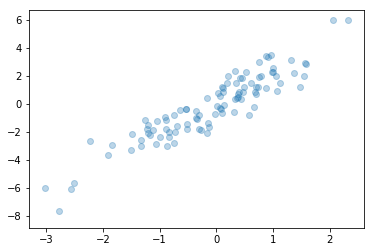

In [9]:
plt.scatter(x[:, 0], x[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);


This sort of strategy is often used to quickly partition datasets, as is often needed in
train/test splitting for validation of statistical models

Modifying Values with Fancy Indexing. Just as fancy indexing can be used to access parts of an array, it can also be used to
modify parts of an array

In [10]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [11]:
i

array([2, 1, 8, 4])

We can use any assignment-type operator for this. For example:

In [12]:
x[i] +=20
x


array([  0, 119, 119,   3, 119,   5,   6,   7, 119,   9])

imagine we have 1,000 values and would like to quickly find where they fall within an array of bins. We could compute it using ufunc.at like this:

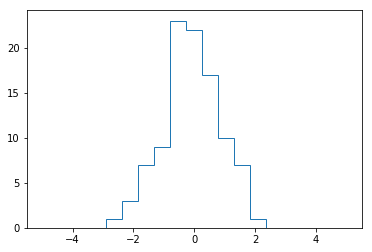

In [13]:
np.random.seed(42)
x=np.random.randn(100)
#compute a histogram by hand
bins = np.linspace(-5,5,20)
counts= np.zeros_like(bins)
# find the appropriate bin for each x
i=np.searchsorted(bins,x)
# add 1 to each of these bins
np.add.at(counts, i, 1)
#The counts now reflect the number of points within each bin—in other words, a histogram 
#plt.plot(bins, counts, linestyle='steps');
plt.hist(x, bins, histtype='step');

Fast sorting pf arrays with np.sort and np.argsort. To return a sorted version of the array without modifying the input, you can use
np.sort:

In [14]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x) #x.sort() produces the same result.


array([1, 2, 3, 4, 5])

 argsort,returns the indices of the sorted elements:

In [15]:
x = np.array([2, 1, 4, 3, 5])
x.argsort()


array([1, 0, 3, 2, 4])

Sorting along rows or columns

In [16]:
rand = np.random.RandomState(42)
x = rand.randint(0, 10, (4, 6))
x

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [17]:
# sort each column of X. Replace axix=0 with 1 to sort rows
np.sort(x, axis=0)


array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

Sometimes we’re not interested in sorting the entire array, but simply want to find the
K smallest values in the array.

In [18]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x,4)

array([2, 1, 3, 4, 5, 6, 7])

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional
array:

In [20]:
np.partition(x, 2, axis=0)


array([1, 2, 3, 7, 6, 5, 4])

The result is an array where the first two slots in each row contain the smallest values
from that row, with the remaining values filling the remaining slots.

Example: k-Nearest Neighbors. We will start by creating random set of 10 points on a 2 dimentional plane.

In [22]:
x= rand.rand(10, 2)
x

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

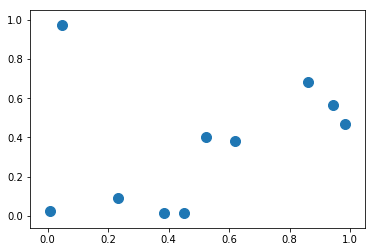

In [23]:
plt.scatter(x[:,0], x[:,1], s=100)


Now we will compute the distance between each pair of points

In [24]:
dist_sq = np.sum((x[:,np.newaxis,:] - x[np.newaxis,:,:]) ** 2, axis=-1)
dist_sq


array([[0.        , 0.40999909, 0.90538547, 0.05550496, 0.50287983,
        1.14976739, 1.15936537, 0.19672877, 1.16632222, 0.14319923],
       [0.40999909, 0.        , 0.55794316, 0.18090431, 0.00906581,
        0.21465798, 0.19098635, 0.15497331, 0.20095384, 0.16679585],
       [0.90538547, 0.55794316, 0.        , 0.81458763, 0.67649219,
        1.13419594, 0.74752753, 1.08562368, 0.9704683 , 1.03211241],
       [0.05550496, 0.18090431, 0.81458763, 0.        , 0.23387834,
        0.70468321, 0.74108843, 0.05338715, 0.72671958, 0.0288717 ],
       [0.50287983, 0.00906581, 0.67649219, 0.23387834, 0.        ,
        0.14021843, 0.1470605 , 0.16449241, 0.13755476, 0.18859392],
       [1.14976739, 0.21465798, 1.13419594, 0.70468321, 0.14021843,
        0.        , 0.06080186, 0.48946337, 0.01100053, 0.56059965],
       [1.15936537, 0.19098635, 0.74752753, 0.74108843, 0.1470605 ,
        0.06080186, 0.        , 0.61258786, 0.02046045, 0.66652228],
       [0.19672877, 0.15497331, 1.0856236

TypeError: can only concatenate list (not "int") to list

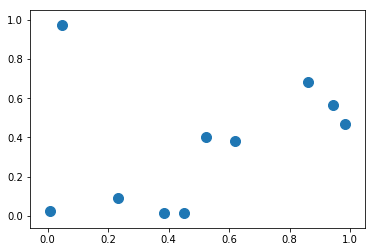

In [25]:
plt.scatter(x[:, 0], x[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
for i in range (x.shape[0]):
    for j in nearest_partition[i, :k+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

The above cell is supposed to draw connections between the dots. Some how it has refused to do this.

Structured Arrays.Imagine that we have several categories of data on a number of people (say, name,
age, and weight). We can create a structured array using a compound data type specification:


In [32]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')}) #formats':((np.str_, 10), int, np.float32) does the same.
print(data.dtype)


[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


Here 'U10' translates to “Unicode string of maximum length 10,” 'i4' translates to “4-byte (i.e., 32 bit) integer,” and 'f8' translates to “8-byte (i.e., 64 bit) float.” 

In [36]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [40]:
data[1 #remember array indexes are not quoted.

('Bob', 45, 85.5)

Using Boolean masking, this even allows you to do some more sophisticated opera‐
tions such as filtering on age:

In [41]:
# Get names where age is under 30
data[data['age'] < 30]['name']


array(['Alice', 'Doug'], dtype='<U10')